In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from IPython import display
import importlib
import os
import matplotlib.pyplot as plt
from PIL import Image
from PARAMETER_INPUT import *
from PARAMETER_INPUT import _lambda, _theta, _eta
import edward_tools.create_cfqr as create_cfqr
U0_kBT_ratio = U0_1/k_BT

In [ ]:
guess = np.array([[-1.96439198, -1.96434052, 99.89691108],
        [-1.96439198,  1.96434052, 99.89691108],
        [ 1.96439198, -1.96434052, 99.89691108],
        [ 1.96439198,  1.96434052, 99.89691108]])

In [ ]:
guess[:, (0, 1)]

# functions

In [ ]:
def getSimulationID(df):
    return [item["simulation_id"] for item in df["simulation_data"]] 

def getDataByComment(df, identifier):
    target = df[df["comment"].str.find(identifier) == 0]
    return target

def getDataByField(df, field):
    return list(target[field])


def showGraph(sim_id):
    work_distribution_img = Image.open(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.png")
    work_distribution_data = np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")
    work_statistic_img = Image.open(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_statistic.png")
    work_statistic_data = np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_statistic.npy")
    display(work_distribution_img)
    display(work_statistic_img)
    # work_distribution_img.show()
    print(sim_id)
    return work_distribution_data, work_statistic_data



def getSimulationWorkStatistics(df, sim_id):
    target = getDataByID(df, sim_id)
    dt = list(target['params'])[0]["dt"]
    N =  list(target['params'])[0]["N"]
    
    work_distribution_data = np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")
    work_statistic_data = np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_statistic.npy")
    jarzyn_term = np.mean(np.exp(-work_distribution_data))
    jarzyn_term_error = 3 * np.std(np.exp(-work_distribution_data)) / np.sqrt(N)
    

    return {
        "work_distribution_data": work_distribution_data,
        "work_statistic_data": work_statistic_data,
        "N": N, "dt": dt, "mean_W": np.mean(work_distribution_data), "mean_W_error": np.std(work_distribution_data) / np.sqrt(len(work_distribution_data)),
        "jarzyn_term": jarzyn_term, "jarzyn_term_error": jarzyn_term_error
    }
    

def loadDataFrame():
    df = pd.read_json("coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/gallery.json")
    df['comment'] = [item['comment'] for item in df["params"]]
    df["simulation_id"] = [item["simulation_id"] for item in df["simulation_data"]]
    return df


def getDataByID(df, sim_id):
    identifier = "Experiment 5"
    target = df[df["simulation_id"] == sim_id]
    return target

def showFidelity(target):

    final_percentage_matrix = np.array([d["final_percentage"] for d in list(target["fidelity"])[0]]).T
    text_box_array = ["\n".join(row) for row in final_percentage_matrix]
    params_list = list(target["params"])[0]
    fig, ax = plt.subplots(1, 2, figsize = [10, 4])
    # plt.figure(figsize=[4, 4])
    # plt.title(f"N = {params_list['N']}, dt = {params_list['dt']}")
    _ax = ax[1]
    _ax.set_xlim(-5, 5);plt.ylim(-5, 5);
    _ax.text(-3.25, -3.5, text_box_array[0]); _ax.text(-3.25, 1.5, text_box_array[1])
    _ax.text(1.75, -3.5, text_box_array[2]); _ax.text(1.75, 1.5, text_box_array[3])
    _ax.vlines(0, ymin = -5, ymax = 5); _ax.hlines(0, xmin = -5, xmax = 5)

# ideal_fidelity = np.array([['0.500', '0.000', '0.500', '0.000'], ['0.500', '0.000', '0.500', '0.000'],
#                           ['0.000', '0.500', '0.000', '0.500'], ['0.000', '0.500', '0.000', '0.500']]).T
# text_box_array = ["\n".join(row) for row in ideal_fidelity]
# plt.figure(figsize=[4, 4])
# plt.title(f"N = {item['N']}, dt = {item['dt']}, t1 = {item['protocol_list'][-1]['duration']} ")
# _ax = ax[0]
# _ax.set_xlim(-5, 5);plt.ylim(-5, 5);
# _ax.text(-3.25, -3.5, text_box_array[0]); _ax.text(-3.25, 1.5, text_box_array[1])
# _ax.text(1.75, -3.5, text_box_array[2]); _ax.text(1.75, 1.5, text_box_array[3])
# _ax.vlines(0, ymin = -5, ymax = 5); _ax.hlines(0, xmin = -5, xmax = 5)

# show a result

In [ ]:
df = loadDataFrame()
target = getDataByComment(df, "Experiment 1 (2024/3/13)")
target = getDataByID(df, "7c1ef86a0287a1cc17d4057e6219bdf222352eeb430273ee538075d35a4fbfb1")
# target = df
sim_id = getSimulationID(target.tail(1))[0]
result_info = getSimulationWorkStatistics(df, sim_id)
# print(result_info)

In [ ]:
target['comment']

In [ ]:
list(target['params'])[0]['circuit_parameter']

In [ ]:
params = list(target['params'])[0]
circuit_parameter = params['circuit_parameter']
protocol_list = list(target['protocol_list_item'])[0]
initial_parameter_dict = list(target['initial_parameter_dict'])[0]
protocol_time_array = [item["duration"] for item in protocol_list]
protocol_time_array.insert(0, 0)
protocol_time_array = np.cumsum(protocol_time_array)

In [ ]:
protocol_time_array

In [ ]:
plt.hist(result_info['work_distribution_data'], bins = 100)
print(np.mean(result_info['work_distribution_data']))

In [ ]:
plt.plot(result_info['work_statistic_data'][::1000, 0])

In [ ]:
list(target['fidelity'])

In [ ]:
print("-" * 30 + " Information " + "-" * 30 )
work_distribution = result_info['work_distribution_data']
work_mean = result_info['work_statistic_data'][:, 0]
target_time_index = np.array(protocol_time_array)/params['dt']
target_time_index = target_time_index.astype("int") - 1


jarzyn_term = np.mean(np.exp(-work_distribution))

circuit_parameter = target['params'].values[0]['circuit_parameter']
initial_parameter = target['initial_parameter_dict'].values[0]
protocol_list_item = target['protocol_list_item'].values[0]



work_done_array = [work_mean[i] for i in target_time_index]
work_done_array.insert(0, 0)
work_done_of_each_step = np.array(work_done_array)[1:] - np.array(work_done_array)[:-1]

print(target["comment"].values[0])
print("(a) parameters")
print(sim_id)
print()
print(f"N = {params['N']}, dt = {params['dt']}")
print(f"phi_1dcx_on: {circuit_parameter['phi_1_dcx_on']}, phi_2dcx_on: {circuit_parameter['phi_2_dcx_on']}, M_12_on: {circuit_parameter['M_12_on']:.3g}")
print(f"L_factor = {circuit_parameter['L_factor']:.3g}, C_factor = {circuit_parameter['C_factor']}, I_m_factor = {circuit_parameter['I_m_factor']}, gamma = {initial_parameter['gamma_1']}")
print([x["duration"] for x in protocol_list_item])
print()
print("(b) thermodynamic cost")
print(f"mean work = {target['mean_work'].values[0]:.3g} ± {3 * result_info['mean_W_error']:.3g}")
print(f"jarzyn = {target['jarzynski_term'].values[0]:.3g} ± {3 * result_info['jarzyn_term_error']:.3g}")
print()



try:
    work_done_after_offset = work_done_of_each_step - offset_value
    print("(c) informational cost")
    print("measurement + reset = ", work_done_after_offset[0] + work_done_after_offset[1] + work_done_after_offset[2] )
    print("control = ", work_done_after_offset[3] + work_done_after_offset[4] + work_done_after_offset[5] + work_done_after_offset[6])
    print(f"net work done = {sum(work_done_after_offset):.3g}")
except:
    pass

print("First way to split the steps: (E, 5-6), (M, 0-2), (C: 3-4)")
print(f"work_done = {work_done_of_each_step}" )
print(f"work_offset = {work_done_after_offset}")
# print("measurement + reset = ", work_done_of_each_step[0] + work_done_of_each_step[1] + work_done_of_each_step[2])
# print("control = ", work_done_of_each_step[3] + work_done_of_each_step[4]  + work_done_of_each_step[5] + work_done_of_each_step[6] )

print("measurement + reset = ", work_done_after_offset[0] + work_done_after_offset[1] + work_done_after_offset[2] )
print("control = ", work_done_after_offset[3] + work_done_after_offset[4] + work_done_after_offset[5] + work_done_after_offset[6])
print("net work done =", sum(work_done_after_offset))
print(sum(work_done_of_each_step))

In [ ]:

print("-" * 60)
print("First way to split the steps: (E, 5-6), (M, 0-2), (C: 3-4)")
print(f"work_done = {work_done_of_each_step}" )
print(f"work_offset = {work_done_after_offset}")
print("measurement + reset = ", work_done_after_offset[0] + work_done_after_offset[1] + work_done_after_offset[2] + work_done_after_offset[5] + work_done_after_offset[6] )
print("control = ", work_done_after_offset[3] + work_done_after_offset[4] )
print(sum(work_done_after_offset))

print("-" * 60)
print("First way to split the steps: (Erasure & Reset, 0 - 3), Control: 3-7)")
print(f"work_done = {work_done_of_each_step}" )
print(f"work_offset = {work_done_after_offset}")
print("measurement + reset = ", work_done_after_offset[0] + work_done_after_offset[1] + work_done_after_offset[2] )
print("control = ", work_done_after_offset[3] + work_done_after_offset[4] + work_done_after_offset[5] + work_done_after_offset[6])
print("net work done =", sum(work_done_after_offset))

In [ ]:
result_info['work_distribution_data'].nbytes

In [ ]:
result_info['work_statistic_data'][:,0].nbytes

In [ ]:
result_info['work_statistic_data'].nbytes

In [ ]:
initial_parameter_dict = pd.DataFrame.from_records([target['initial_parameter_dict'].values[0]])
circuit_parameter = pd.DataFrame.from_records([target['params'].values[0]['circuit_parameter']])

In [ ]:
initial_parameter_dict

In [ ]:
circuit_parameter

In [ ]:
showGraph(list(target["simulation_data"])[0]['simulation_id'])

In [ ]:
showFidelity(target)

In [ ]:
plt.hist(result_info['work_distribution_data'], 100)

In [ ]:
0.816/0.184

In [ ]:
np.mean(np.exp(-result_info['work_distribution_data']))

In [ ]:
def substep_work_extraction(target, offset = False):
    sim_id = getSimulationID(target)[0]
    result_info = getSimulationWorkStatistics(df, sim_id)
    
    _dt = result_info['dt']
    
    work_statistic_data = result_info['work_statistic_data']
    protocol_list_item = list(target["protocol_list_item"])[0]
    print(protocol_list_item)
    protocol_time_array = [item["duration"] for item in protocol_list_item]
    protocol_time_array = np.cumsum(protocol_time_array)/_dt
    work_done_at_all_stages = [work_statistic_data[int(i)-1][0] for i in protocol_time_array]
    work_done_at_all_stages.insert(0, 0)
    work_done_at_all_stages = np.array(work_done_at_all_stages)
    net_work_done = work_done_at_all_stages[1:] - work_done_at_all_stages[:-1]
    offset_U = 0
    
    if offset:
        offset_U = min_U_at_each_non_linear_pot[1:] - min_U_at_each_non_linear_pot[:-1]
    return net_work_done - offset_U
    
    

In [ ]:
work_done_each_step = substep_work_extraction(target, offset = True)

In [ ]:
np.sum(work_done_each_step[3:])

In [ ]:
np.sum(work_done_each_step)

In [ ]:
work_done_each_step

In [ ]:
final_percentage_matrix = np.array([d["final_percentage"] for d in list(target["fidelity"])[0]]).T
text_box_array = ["\n".join(row) for row in final_percentage_matrix]
params_list = list(target["params"])[0]
fig, ax = plt.subplots(1, 2, figsize = [10, 4])
# plt.figure(figsize=[4, 4])
# plt.title(f"N = {params_list['N']}, dt = {params_list['dt']}")
_ax = ax[1]
_ax.set_xlim(-5, 5);plt.ylim(-5, 5);
_ax.text(-3.25, -3.5, text_box_array[0]); _ax.text(-3.25, 1.5, text_box_array[1])
_ax.text(1.75, -3.5, text_box_array[2]); _ax.text(1.75, 1.5, text_box_array[3])
_ax.vlines(0, ymin = -5, ymax = 5); _ax.hlines(0, xmin = -5, xmax = 5)

# ideal_fidelity = np.array([['0.500', '0.000', '0.500', '0.000'], ['0.500', '0.000', '0.500', '0.000'],
#                           ['0.000', '0.500', '0.000', '0.500'], ['0.000', '0.500', '0.000', '0.500']]).T
# text_box_array = ["\n".join(row) for row in ideal_fidelity]
# plt.figure(figsize=[4, 4])
# plt.title(f"N = {item['N']}, dt = {item['dt']}, t1 = {item['protocol_list'][-1]['duration']} ")
# _ax = ax[0]
# _ax.set_xlim(-5, 5);plt.ylim(-5, 5);
# _ax.text(-3.25, -3.5, text_box_array[0]); _ax.text(-3.25, 1.5, text_box_array[1])
# _ax.text(1.75, -3.5, text_box_array[2]); _ax.text(1.75, 1.5, text_box_array[3])
# _ax.vlines(0, ymin = -5, ymax = 5); _ax.hlines(0, xmin = -5, xmax = 5)

# compare results

In [ ]:
sim_id_to_compare = ["c2e2d9a10eca0b331ca768e3dad02ab1283557d1d2b7e3fdb56dbf92a868bba9", 
                     "91b01116c21a74c8c79a0abb766c316789892c7d3bfad8d88b78df2005fb2009",
                     "64df0cd6e5cbd1d310e9b893bc16f49b302188661080f648ba980b149dc6da03"]


In [ ]:
df = loadDataFrame()
result_array = []
circuit_parameter_array = []
initial_parameter_dict_array = []
for _sim_id in sim_id_to_compare:
    target = getDataByID(df, _sim_id)
    result_info = getSimulationWorkStatistics(df, _sim_id)
    result_array.append(result_info)
    initial_parameter_dict = target['initial_parameter_dict'].values[0]
    initial_parameter_dict_array.append(initial_parameter_dict)
    
    circuit_parameter = target['params'].values[0]['circuit_parameter']
    circuit_parameter_array.append(circuit_parameter)
    

In [ ]:
df_for_comparison = pd.DataFrame.from_records(result_array)
df_for_circuit_parameter_array = pd.DataFrame.from_records(circuit_parameter_array)
df_for_initial_parameter_dict_array= pd.DataFrame.from_records(initial_parameter_dict_array)

In [ ]:
df_for_comparison[["N", "dt", "mean_W", "jarzyn_term"]]

In [ ]:
df_for_circuit_parameter_array[['C_factor', 'L_factor', 'I_m_factor', 'phi_1_dcx_on', 'phi_2_dcx_on', 'M_12_on']]

In [ ]:
df_for_initial_parameter_dict_array

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = [10, 9])
ax_flatten = ax.flatten()
df_for_comparison['work_distribution_data'].values
ax_flatten[0].hist(df_for_comparison['work_distribution_data'].values[0], bins = 20)
ax_flatten[1].hist(df_for_comparison['work_distribution_data'].values[1], bins = 20)

# time duration analysis

In [ ]:
df = pd.read_json("coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/gallery.json")

In [ ]:
step_analysis = ["Experiment 8 (2024/2/15): time scan for step 6"]

In [ ]:
def showTimeDurationAnalysis(identifier):
    df = loadDataFrame()
    # identifier = "Experiment 2 (2024/1/30)"
    target = df[df["comment"].str.find(identifier) == 0]
    sim_id_array = [item["simulation_id"] for item in target["simulation_data"]] 
    time_array = [item[-1]["duration"] for item in target["protocol_list_item"]]
    mean_work = list(target["mean_work"])
    work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]
    plt.errorbar(time_array, mean_work,
             yerr = work_distribution_error_array,
             fmt ='o')

In [ ]:
showTimeDurationAnalysis("Experiment 8 (2024/2/15): time scan for step 6")

In [ ]:
showTimeDurationAnalysis("Experiment 4 (2024/2/15): time scan for step 2")

In [ ]:
showTimeDurationAnalysis("Experiment 5 (2024/2/15): time scan for step 3")


In [ ]:
showTimeDurationAnalysis("Experiment 7 (2024/2/15): time scan for step 5")

In [ ]:
showTimeDurationAnalysis("Experiment 8 (2024/2/15): time scan for step 6")


In [ ]:
for sim_id in sim_id_array:
    _target = getDataByID(df, sim_id)
    final_percentage_matrix = np.array([d["final_percentage"] for d in list(_target["fidelity"])[0]]).T
    text_box_array = ["\n".join(row) for row in final_percentage_matrix]
    params_list = list(_target["params"])[0]
    fig, ax = plt.subplots(1, 2, figsize = [10, 4])
    # plt.figure(figsize=[4, 4])
    # plt.title(f"N = {params_list['N']}, dt = {params_list['dt']}")
    _ax = ax[1]
    _ax.set_xlim(-5, 5);plt.ylim(-5, 5);
    _ax.text(-3.25, -3.5, text_box_array[0]); _ax.text(-3.25, 1.5, text_box_array[1])
    _ax.text(1.75, -3.5, text_box_array[2]); _ax.text(1.75, 1.5, text_box_array[3])
    _ax.vlines(0, ymin = -5, ymax = 5); _ax.hlines(0, xmin = -5, xmax = 5)

# ideal_fidelity = np.array([['0.500', '0.000', '0.500', '0.000'], ['0.500', '0.000', '0.500', '0.000'],
#                           ['0.000', '0.500', '0.000', '0.500'], ['0.000', '0.500', '0.000', '0.500']]).T
# text_box_array = ["\n".join(row) for row in ideal_fidelity]
# plt.figure(figsize=[4, 4])
# plt.title(f"N = {item['N']}, dt = {item['dt']}, t1 = {item['protocol_list'][-1]['duration']} ")
# _ax = ax[0]
# _ax.set_xlim(-5, 5);plt.ylim(-5, 5);
# _ax.text(-3.25, -3.5, text_box_array[0]); _ax.text(-3.25, 1.5, text_box_array[1])
# _ax.text(1.75, -3.5, text_box_array[2]); _ax.text(1.75, 1.5, text_box_array[3])
# _ax.vlines(0, ymin = -5, ymax = 5); _ax.hlines(0, xmin = -5, xmax = 5)

In [ ]:
for x in range(0, 6):
    target = df[df["comment"] == step_analysis[x]]
    sim_id_array = [item["simulation_id"] for item in target["simulation_data"]] 
    time_array = [item[0]["duration"] for item in target["protocol_list_item"]]
    mean_work = list(target["mean_work"])
    work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]
    plt.errorbar(time_array, mean_work,
             yerr = work_distribution_error_array,
             fmt ='o')
    plt.show()

# offset and no offset analysis

In [ ]:
df = loadDataFrame()
# target = getDataByID(df, "5aec0e959e8dcfe0fa75be2316b8c18c49debf818321aa76c32966fe9460c40e")
target = getDataByComment(df, "Experiment 2 (2024/1/30)")
sim_id_array = getSimulationID(target)


In [ ]:
sim_id_array

In [ ]:
target

In [ ]:
target_data = getSimulationWorkStatistics(df, "5aec0e959e8dcfe0fa75be2316b8c18c49debf818321aa76c32966fe9460c40e")

In [ ]:
list(target.protocol_list_item)

In [ ]:
substage_index = np.cumsum(np.array([item["duration"] for item in list(target.protocol_list_item)[0]]))/target_data['dt']

In [ ]:
target.columns

In [ ]:
target_data["work_statistic_data"][39999]

In [ ]:
target_data["work_statistic_data"][80000-1]

In [ ]:
[target_data["work_statistic_data"][int(i)-1] for i in substage_index]



In [ ]:
work_distribution_data, work_statistic_data = showGraph(getSimulationID(target)[0])



In [ ]:
# plt.yscale("log")
plt.plot(range(0, len(work_statistic_data)), -work_statistic_data[:, 0])

In [ ]:

target = df[df["comment"] == step_analysis[x]]
    sim_id_array = [item["simulation_id"] for item in target["simulation_data"]] 
    time_array = [item[0]["duration"] for item in target["protocol_list_item"]]
    mean_work = list(target["mean_work"])
    work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]
    plt.errorbar(time_array, mean_work,
             yerr = work_distribution_error_array,
             fmt ='o')
    plt.show()

In [ ]:
df.tail(1)['params']

In [ ]:
df.tail(1)["jarzynski_term"]

In [ ]:
sim_id = [x['simulation_id'] for x in df[-2:]["simulation_data"]]
mean_work_array = []
for _id in sim_id:
    npy_file_path = f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{_id}_work_distribution.npy"
    mean_work_array.append(np.mean(np.load(npy_file_path)))

In [ ]:
mean_work_array

In [ ]:
np.mean(mean_work_array)

In [ ]:
np.std(mean_work_array)

In [ ]:
work_distribution_np_array = np.load("coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/6aadc3862c80d54c93d667d2fcdf33e7df4df3733c5f1e07e55062ec067d24e7_work_distribution.npy")

In [ ]:
mean_work = np.mean(work_distribution_np_array)

In [ ]:
plt.hist(work_distribution_np_array, bins = 50)
plt.xlabel(r"work ($k_BT$)", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 12000)

plt.ylabel("counts", fontsize=15)
plt.vlines(x=mean_work, ymin=0, ymax= 10500, colors="red", linestyles="--", linewidth = 3)
plt.text(-0.5, 11000, r"$\langle W \rangle $ = " + f"{mean_work:.3g}", fontsize = 13, color = "red")
# plt.text(x = 1.5, y = 9000, s=")

# stitch analysis

In [ ]:
df = loadDataFrame()

In [ ]:
identifier = "Experiment 5"
target = df[df["comment"].str.find(identifier) == 0]

# target = getDataByID(df, "958a28896d8b11b0b1283b05c5f5816d8816b4b743a8013c2d1e721c2de61d9b")

In [ ]:
list(target["simulation_id"])[0]

In [ ]:
getSimulationWorkStatistics(df, list(target["simulation_id"])[0])

In [ ]:
showGraph(getSimulationID(target)[0])

In [ ]:
np.linspace(15, 40, 6)

# gamma analysis

In [ ]:
df = loadDataFrame()
target = getDataByComment(df, "Experiment 1a (2024/2/24)")
sim_id_array = getSimulationID(target)
workStatisticArray = [getSimulationWorkStatistics(target, sim_id) for sim_id in sim_id_array]
mean_W_array = np.array([(item['mean_W'], item['mean_W_error']) for item in workStatisticArray])
jarzy_array = np.array([(item['jarzyn_term'], item['jarzyn_term_error']) for item in workStatisticArray])

gamma_array = [d['gamma_1'] for d in target['initial_parameter_dict']]
mean_work = list(target["mean_work"])
work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]

In [ ]:
plt.errorbar(gamma_array, mean_work,
         yerr = work_distribution_error_array,
         fmt ='o')
# plt.xscale("log")
plt.ylabel(r"$\langle W \rangle (k_BT)$", fontsize = 15)
plt.xlabel("gamma", fontsize = 15)

In [ ]:
plt.errorbar(gamma_array, mean_work,
         yerr = work_distribution_error_array,
         fmt ='o')
plt.ylabel(r"$\langle W \rangle (k_BT)$", fontsize = 15)
plt.xlabel(r"$\gamma$", fontsize = 15)

# L analysis

In [ ]:
df = loadDataFrame()
target = getDataByComment(df, "Experiment 5 (2024/2/24): check for erasure only protocol, what is the effect of changing L from 0.3 to 5.0 affect the work done")
sim_id_array = getSimulationID(target)


In [ ]:
target.head(1).columns

In [ ]:
workStatisticArray = [getSimulationWorkStatistics(target, sim_id) for sim_id in sim_id_array]
mean_W_array = np.array([(item['mean_W'], item['mean_W_error']) for item in workStatisticArray])
jarzy_array = np.array([(item['jarzyn_term'], item['jarzyn_term_error']) for item in workStatisticArray])

In [ ]:
# L_array = np.array([item['circuit_params']["L_1"] for item in target["params"]]) * 1e9
# L_array = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]) * 1
L_array = [d['circuit_parameter']["L_factor"] for d in target['params']]
mean_work = list(target["mean_work"])
work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]




In [ ]:
for x in zip(L_array, mean_work):
    print(f"({x[0]:.3g}, {x[1]:.3g})")

In [ ]:
plt.errorbar(L_array, mean_work,
         yerr = work_distribution_error_array,
         fmt ='o')
plt.xscale("log")
plt.ylabel(r"$\langle W \rangle (k_BT)$", fontsize = 15)
plt.xlabel("L (nH)", fontsize = 15)

# C analysis

In [ ]:
df = loadDataFrame()
target = getDataByComment(df, "Experiment 3 (2024/2/24)")
sim_id_array = getSimulationID(target)
# C_array = np.array([0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]) * 4
C_array = [d['circuit_parameter']["C_factor"] for d in target['params']]

In [ ]:
C_array

In [ ]:
workStatisticArray = [getSimulationWorkStatistics(target, sim_id) for sim_id in sim_id_array]
mean_W_array = np.array([(item['mean_W'], item['mean_W_error']) for item in workStatisticArray])
jarzy_array = np.array([(item['jarzyn_term'], item['jarzyn_term_error']) for item in workStatisticArray])

In [ ]:
mean_W_array

In [ ]:
plt.xscale("log")
plt.scatter(C_array, mean_W_array[:,0])

In [ ]:
mean_work = list(target["mean_work"])
work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]


In [ ]:
showGraph(target.simulation_id.values[0])

In [ ]:
getSimulationWorkStatistics(target, target.simulation_id.values[0])

In [ ]:
plt.errorbar(C_array, mean_work,
         yerr = work_distribution_error_array,
         fmt ='o')
plt.xscale("log")
plt.ylabel(r"$\langle W \rangle (k_BT)$", fontsize = 15)
plt.xlabel("C (nF)", fontsize = 15)

In [ ]:
target

# dt analysis

In [ ]:
df = loadDataFrame()
target = getDataByComment(df, "Experiment 1 (2024/1/29)")
sim_id_array = getSimulationID(target)

In [ ]:
dt_array = [1/item["dt"] for item in list(target["params"])]
workStatisticArray = [getSimulationWorkStatistics(target, sim_id) for sim_id in sim_id_array]

In [ ]:
mean_W_array = np.array([(item['mean_W'], item['mean_W_error']) for item in workStatisticArray])
jarzy_array = np.array([(item['jarzyn_term'], item['jarzyn_term_error']) for item in workStatisticArray])

In [ ]:
jarzy_array

In [ ]:
plt.xscale('log')
plt.ylabel('work_done')
plt.xlabel('1/dt')
plt.scatter(dt_array, mean_W_array[:, 0])

# I_m test

In [ ]:

df = loadDataFrame()
target = getDataByComment(df, "Experiment 2 (2024/3/12)")
sim_id_array = getSimulationID(target)

In [ ]:
fidelity_list = []
for data in list(target['fidelity']):
    fidelity_list.append(np.array([row['final_percentage'] for row in data]))

In [ ]:
fidelity_list = np.array(fidelity_list, dtype = float)

In [ ]:
fidelity_list[:, 0:2, (1, 3)] = fidelity_list[:, 2:4, (1, 3)]

In [ ]:
phi_x_on_value_array = np.linspace(-0.0080, -0.0040, 10)
np.array(np.meshgrid(phi_x_on_value_array, phi_x_on_value_array)).T.reshape(-1,2)[24]

In [ ]:
square_difference = np.square((fidelity_list[:, (0,1), :] - 0.5).reshape(fidelity_list.shape[0], -1))

In [ ]:
minimum_index = np.argmin(np.sum(square_difference, axis = 1))

In [ ]:
target.iloc[minimum_index]['fidelity']

In [ ]:
target.iloc[minimum_index]['initial_parameter_dict']

In [ ]:
target.iloc[minimum_index]['protocol_list_item']

In [ ]:
target.iloc[minimum_index]

In [ ]:
work_distribution_data_array = [ 
    np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")
    for sim_id in list(target['simulation_id'])]

In [ ]:
for dist in work_distribution_data_array:
    plt.hist(dist, bins = 50)
    plt.show()

In [ ]:
for item in list(target['fidelity']):
    final_percentage_matrix = np.array([d["final_percentage"] for d in item]).T
    text_box_array = ["\n".join(row) for row in final_percentage_matrix]

    
    # fig, ax = plt.subplots(1, 1, figsize = [10, 4])
    plt.figure(figsize=[4, 4])
    # plt.title(f"N = {item['N']}, dt = {item['dt']}, t1 = {item['protocol_list'][-1]['duration']} ")
    plt.xlim(-5, 5); plt.ylim(-5, 5);
    plt.text(-3.25, -3.5, text_box_array[0]); plt.text(-3.25, 1.5, text_box_array[1])
    plt.text(1.75, -3.5, text_box_array[2]); plt.text(1.75, 1.5, text_box_array[3])
    plt.vlines(0, ymin = -5, ymax = 5); plt.hlines(0, xmin = -5, xmax = 5)
    plt.show()


In [ ]:
I_m_array = np.array([item['circuit_params']['I_m_1'] for item in list(target['params'])]) * 1e9

In [ ]:
mean_W_array = [getSimulationWorkStatistics(df,sim_id )['mean_W'] for sim_id in sim_id_array]

In [ ]:
plt.ylabel(r"$\langle W \rangle$")
plt.xlabel(r"$I_m (nA)$")
# plt.xscale("log")
plt.scatter(I_m_array, mean_W_array)

In [ ]:

df = loadDataFrame()
target = getDataByComment(df, "Experiment 5 (2024/2/24): see the effect of M_12")
sim_id_array = getSimulationID(target)

In [ ]:
M_12_array = [d['circuit_parameter']["M_12_on"] for d in target['params']]
# I_m_array = np.array([item['circuit_param']['M_12_on'] for item in list(target['params'])])

In [ ]:
workStatisticArray = [getSimulationWorkStatistics(target, sim_id) for sim_id in sim_id_array]
mean_W_array = np.array([(item['mean_W'], item['mean_W_error']) for item in workStatisticArray])
jarzy_array = np.array([(item['jarzyn_term'], item['jarzyn_term_error']) for item in workStatisticArray])
mean_work = list(target["mean_work"])
work_distribution_error_array = [3/np.sqrt(10000) * np.std(np.load(f"/Users/tkwtang/source/coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_work_distribution.npy")) for sim_id in sim_id_array]

plt.errorbar(M_12_array, mean_work,
         yerr = work_distribution_error_array,
         fmt ='o')
# plt.xscale("log")
plt.ylabel(r"$\langle W \rangle (k_BT)$", fontsize = 15)
plt.xlabel("L (nH)", fontsize = 15)

# phi_x_test

In [ ]:
df = loadDataFrame()
target = getDataByComment(df, "Experiment 1 (2024/3/11)")
sim_id_array = getSimulationID(target)
mean_W_array = [getSimulationWorkStatistics(df,sim_id )['mean_W'] for sim_id in sim_id_array]

In [ ]:
target['fidelity']

# fidelity analysis

In [ ]:
df = loadDataFrame()

# target = getDataByID(df, "5aec0e959e8dcfe0fa75be2316b8c18c49debf818321aa76c32966fe9460c40e")
target = getDataByComment(df, "Experiment 2 (2024/1/30)")

In [ ]:
showFidelity(target)

In [ ]:
final_percentage_matrix

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
# 4 well potential
def Fcn_4_well(x):
    return [x[0] - beta_2 * np.sin(x[0]), 
                x[1] - beta_2 * np.sin(x[1])
    ]
sol_1 = fsolve(Fcn_4_well, [2, 2])
sol_2 = fsolve(Fcn_4_well, [2, -2])
sol_3 = fsolve(Fcn_4_well, [-2, 2])
sol_4 = fsolve(Fcn_4_well, [-2, -2])

print(sol_1, sol_2, sol_3, sol_4)

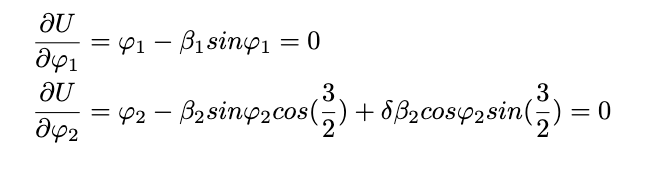

In [ ]:
# mix in y
def Fcn_Mix_in_y(x):
    return [
          x[0] - beta_2 * np.sin(x[0]), 
          x[1] - beta_2 * np.sin(x[1]) * np.cos(3/2) + d_beta_2 * np.cos(x[1]) * np.sin(3/2)
    ]
sol_1 = fsolve(Fcn_Mix_in_y, [2, 0])
sol_2 = fsolve(Fcn_Mix_in_y, [-2, 0])
print(sol_1, sol_2)

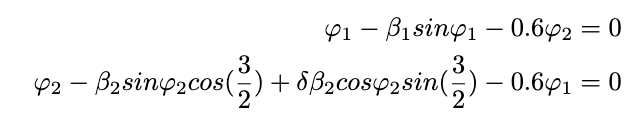

In [ ]:
# Conditional_tilt
def Fcn_conditional_tilt(x):
    return [x[0] - beta_1 * np.sin(x[0]) + -0.6 * x[1],
            x[1] - beta_2 * np.sin(x[1]) * np.cos(3/2) + d_beta_2 * np.cos(x[1]) * np.sin(3/2) + -0.6 * x[0]]

sol_1 = fsolve(Fcn_conditional_tilt, [2.6, 2])
sol_2 = fsolve(Fcn_conditional_tilt, [-2.6, -2])
print(sol_1, sol_2)

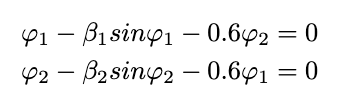

In [ ]:
def Fcn_raise_barrier(x):
    return [x[0] - beta_1 * np.sin(x[0]) - 0.6 * x[1],
            x[1] - beta_2 * np.sin(x[1]) - 0.6 * x[0]
           ]

sol_1 = fsolve(Fcn_raise_barrier, [2.6, 2])
sol_2 = fsolve(Fcn_raise_barrier, [-2.6, -2])
print(sol_1, sol_2)

In [ ]:
def Fcn_conditional_tilt_in_x(x):
    return [
          x[0] - beta_2 * np.sin(x[0]) * np.cos(3/2) + d_beta_2 * np.cos(x[0]) * np.sin(3/2) + -0.6 * x[1],
          x[1] - beta_1 * np.sin(x[1]) + -0.6 * x[0],
    ]
sol_1 = fsolve(Fcn_conditional_tilt_in_x, [2, 2])
sol_2 = fsolve(Fcn_conditional_tilt_in_x, [-2, -2])
print(sol_1, sol_2)

In [ ]:
# mix in y

def Fcn_Mix_in_x(x):
    return [
        x[0] - beta_2 * np.sin(x[0]) * np.cos(3/2) + d_beta_2 * np.cos(x[0]) * np.sin(3/2),
        x[1] - beta_2 * np.sin(x[1])
    ]
sol_1 = fsolve(Fcn_Mix_in_x, [0, 2])
sol_2 = fsolve(Fcn_Mix_in_x, [0, -2])
print(sol_1, sol_2)

In [ ]:
sol

In [ ]:
score_string = """12.5
12.75
15.25
16
16.75
17.25
17.5
18.25
20
20
20
20
20
20
9.25
11.75
12.25
13.25
13.25
14
15.25
15.75
15.75
20
20
20
20
8.5
12.25
13
13.25
14.25
14.5
15
16
17.5
19
19.5
20
20
20
20
20
20
9.25
11
11
12.5
13.25
13.5
15.75
16.75
17.25
17.5
19
20
20
20
20
20"""

In [ ]:
quiz_1_data = [float(s) for s in score_string.split("\n")]

In [ ]:
plt.hist(quiz_1_data)

In [ ]:
sim_id = "36e21ba0a419f66257fdedf5f312f85e4e404beb8a37796c5e9992c32095e690"

In [ ]:
np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id}_all_state.npy")

In [ ]:
# comparing two work distributions

In [ ]:
sim_id_1 = "982112af728dc4b2496bee543c0cadeb9a73d86b59c5cc868ed4a941e9874955"
sim_id_2 = "23818bed74c7e71a603fa84bd2fc8b9ffb768f5252fc76562cc57d5de868d76d"

work_distribution_time_array_1 = np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id_1}_work_distribution_time_array.npy")
work_distribution_time_array_2 = np.load(f"coupled_flux_qubit_protocol/coupled_flux_qubit_data_gallery/{sim_id_2}_work_distribution_time_array.npy")



In [ ]:

def plot_work_dist_with_time(work_distribution_time_array_1, work_distribution_time_array_2):
    fig, ax = plt.subplots(1, 2)
    
    fig.set_size_inches(10,5)
    
    def animate(i):
        ax[0].clear()
        ax[1].clear()
        # Get the point from the points list at index i
        _dist_1 = work_distribution_time_array_1[i]
        _dist_2 = work_distribution_time_array_2[i]
        work_min = np.min(_dist_1) - 3
        work_max = np.max(_dist_1) + 3
        bins = np.linspace(work_min, work_max, 50)

        # Plot that point using the x and y coordinates
        ax[0].hist(_dist_1, bins = bins)
        ax[1].hist(_dist_2, bins = bins)
        # ax[0].set_title(f"t = {_skipped_step_time_array[i]}")
        # Set the x and y axis to display a fixed range
    ani = animation.FuncAnimation(fig, animate, frames=len(work_distribution_time_array_1),
                        interval=100, repeat=False)
    plt.close()
    return ani




In [ ]:
skip_frame = 25
ani = plot_work_dist_with_time(work_distribution_time_array_1[::skip_frame], work_distribution_time_array_2[::skip_frame])
html = HTML(ani.to_html5_video())



In [ ]:
display(html)